This notebook contains the code for our advanced data mining project on California House Pricing. We will first understand the data. We will preprocess the data and do some exploratory data analytics with visualization. Then we shall continue to feature extraction and after we are done with these processes apply some machine learning models and see our results.

In [29]:
import pandas as pd

In [30]:
raw_data = pd.read_csv('housing.csv')
raw_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


About this file
1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house w.r.t ocean/sea

We see the attributes in the given data and we are going to predict the median house value depending on the features. We though need to check the data for discrepancies, null values, engineer a solution for the null values and do a few visualization to aid in our data preprocessing , so let's get into that

Importing dependencies for data preprocessing

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [32]:
rows = raw_data.shape[0]
columns = raw_data.shape[1]

print("Rows:",rows)
print("Columns:",columns)



Rows: 20640
Columns: 10


In [33]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [34]:
raw_data.describe()  #only works on numerical columns

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Observations:

We see that count of total bedrooms do not match up with the rest of the data so there must be some missing values in that field.
We now have median house age information, total rooms, population and median income.

Exploratory Data Analytics and Visualizing Trends in Data

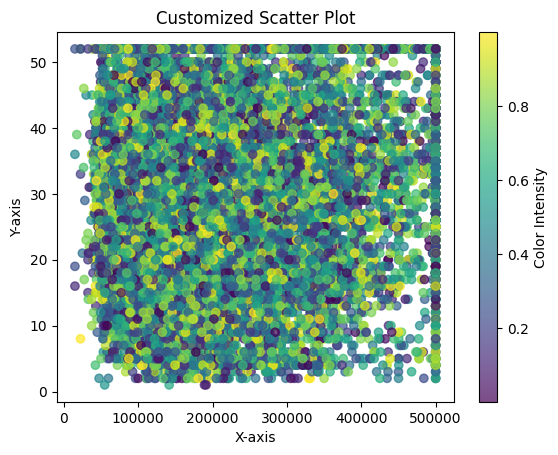

In [35]:
%matplotlib inline
import math

colors = np.random.rand(20640)


plt.scatter(raw_data.median_house_value, raw_data.housing_median_age, c = colors , alpha=0.7, cmap='viridis')

# Add title and axis labels
plt.title("Customized Scatter Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

# Display color intensity scale
plt.colorbar(label='Color Intensity')

# Show the plot
plt.show()

Customized scatter plot to show prices(X) of houses based on age(Y) and intensity of the hue is how many houses are in that range. This is done to check if there are any hidden patterns based on house age. (SS1)


Dealing with null values in bedrooms







The bedroom null values comprise only 2% of the original data set and hence we have decided to drop the rows with no bedroom count

In [36]:
raw_data.dropna(inplace = True)
raw_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [37]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [10]:
raw_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

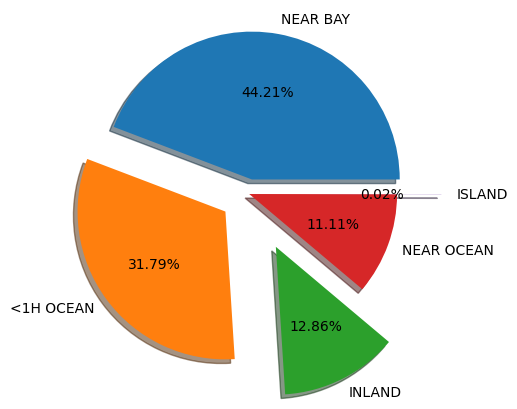

In [38]:
plt.pie(raw_data['ocean_proximity'].value_counts(normalize=True), autopct='%1.2f%%',labels=raw_data['ocean_proximity'].unique(), shadow = True, explode = [0.1,0.2,0.4,0,0.3] );

A pie chart to show distribution of listed houses based on location

In [39]:
pd.get_dummies(raw_data.ocean_proximity, dtype=int)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


We need to perform 1 hot Encoding on the textual column for our model to work

In [40]:
transformed_data = raw_data.join(pd.get_dummies(raw_data.ocean_proximity,dtype=int)).drop(['ocean_proximity'],axis = 1)
transformed_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [41]:
transformed_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398,0.320831,-0.055337,0.009501,-0.474714,0.046185
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638,-0.446928,0.351084,-0.016662,0.358785,-0.161342
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432,0.045553,-0.236968,0.017105,0.256149,0.020797
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294,-0.003777,0.026477,-0.007603,-0.023647,-0.008674
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.018314,-0.006463,-0.004361,-0.019873,0.000679
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300,0.073450,-0.019602,-0.010451,-0.061480,-0.023498
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894,0.041883,-0.038265,-0.009119,-0.011280,0.002106
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355,0.168715,-0.237536,-0.009281,0.056677,0.027351
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000,0.257614,-0.484787,0.023525,0.160526,0.140378
<1H OCEAN,0.320831,-0.446928,0.045553,-0.003777,0.018314,0.073450,0.041883,0.168715,0.257614,1.000000,-0.607778,-0.013928,-0.314721,-0.342018


Take a look how the features are correlated to the median house value(price) If it is positively correlated then price increases else it decreases

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

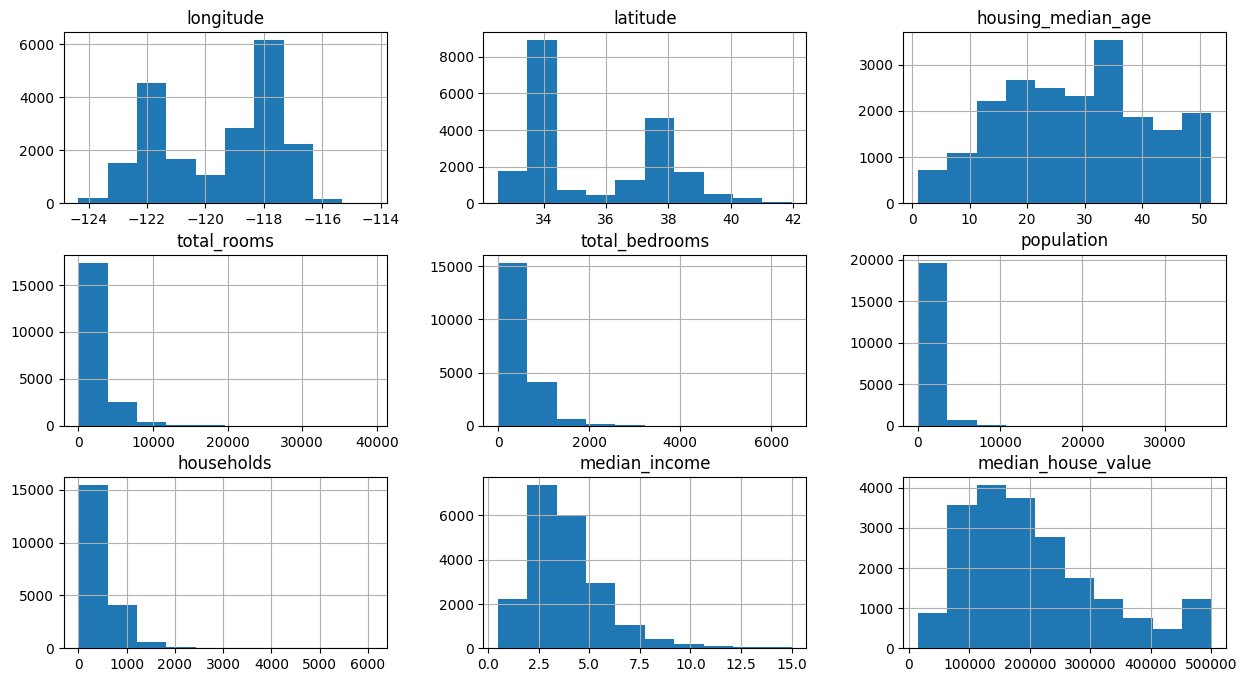

In [42]:
raw_data.hist(figsize = (15,8))

Histograms showing how each feature is related to the number of houses listed in that range.

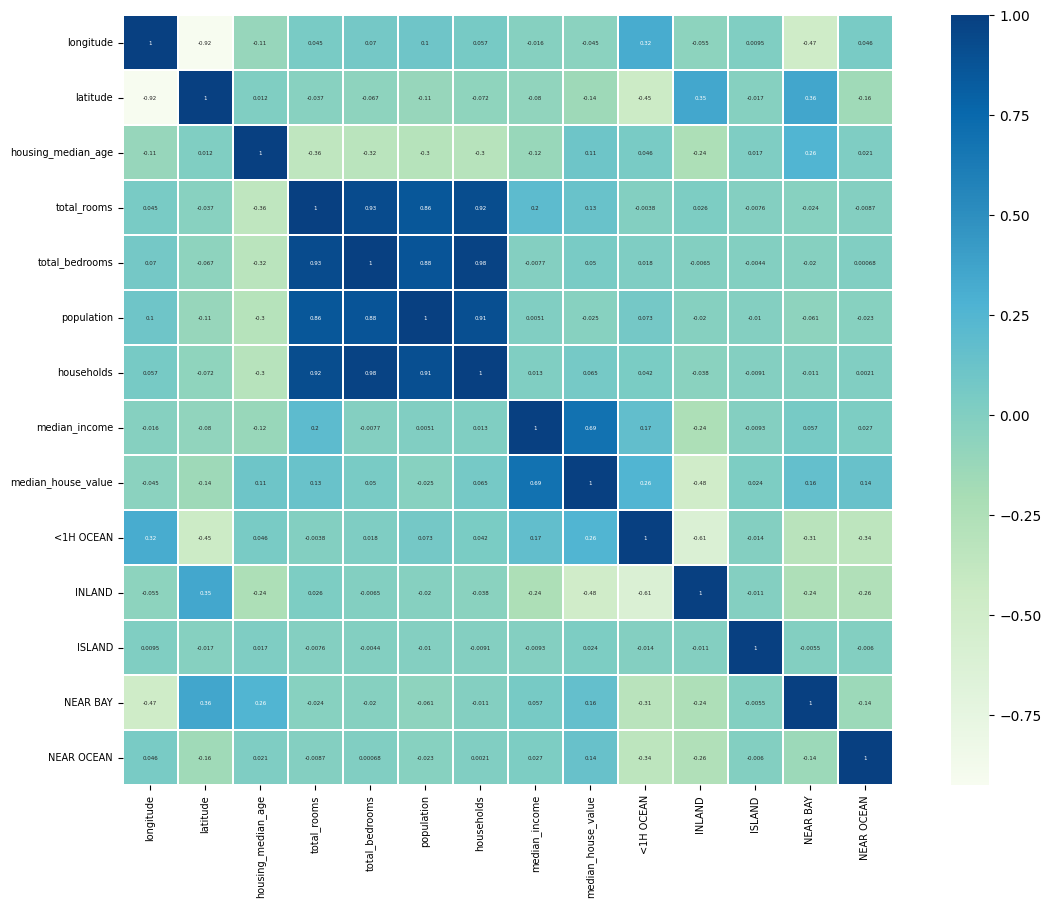

In [43]:
plt.figure(figsize=(15,10))

g=sns.heatmap(transformed_data.corr(), vmin=transformed_data.corr().values.min(),
              vmax=1, square=True, cmap="GnBu", linewidths=0.1,
              annot=True, annot_kws={"fontsize":4},
              xticklabels=1, yticklabels=1)

g.set_xticklabels(g.get_xticklabels(), fontsize = 7)
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 7)
plt.show()

Heatmap based on data correlation (SS3)

Geospatial Exploration of the given data (SS4)

<Axes: xlabel='latitude', ylabel='longitude'>

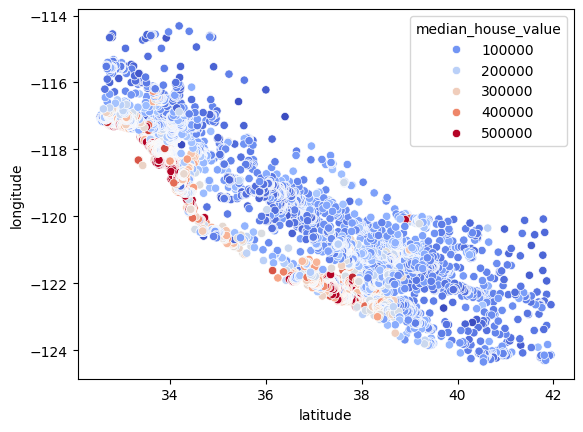

In [44]:
#further testing the median house value
sns.scatterplot(x = 'latitude',y = 'longitude',data = transformed_data,hue = 'median_house_value',palette = 'coolwarm')

This is an exciting plot which draws the Los Angeles coast line using latitude and longitude. Also you can see the places closer to the sea( Pacific Ocean) are costlier than the inland properties. (SS4)

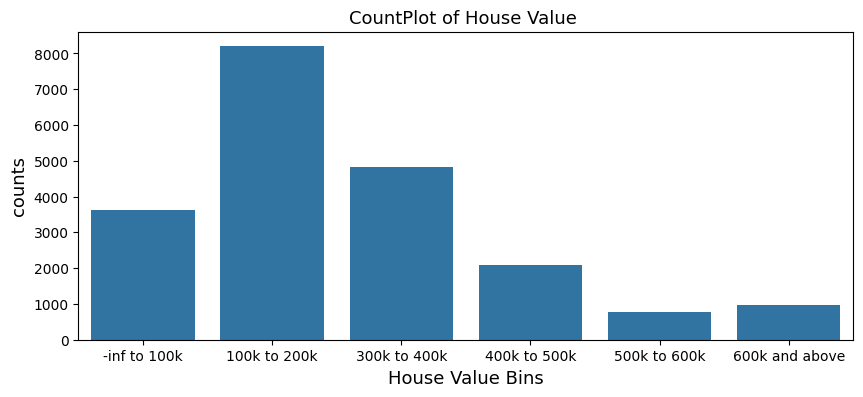

In [45]:
meadian_house_cv = pd.cut(x=transformed_data['median_house_value'],
                          bins=(-np.inf, 100000,200000,300000,400000,500000,np.inf),
                          labels=('-inf to 100k', '100k to 200k', '300k to 400k', '400k to 500k', '500k to 600k', '600k and above'))
## countpLot for the above chunks
plt.figure(figsize=(10,4))
sns.countplot(x=meadian_house_cv)
plt.title('CountPlot of House Value ', fontsize=13, c='k')
plt.xlabel('House Value Bins', fontsize=13, c='k')
plt.ylabel('counts', fontsize=13,c='k')
plt.show()

How many houses are in which price bracket (SS5)


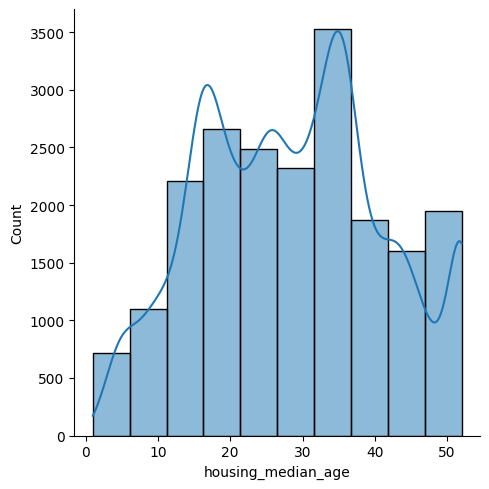

In [46]:
sns.displot(data = transformed_data, x = 'housing_median_age',kde = True, bins=10)

(Same graph done as a different graph)

Trying some other approaches for dimensionality reduction

###1. From the correlation we understand that total rooms and total bedrooms are extremely correlated and we can get rid of total rooms as a house is mostly sold on the basis of bed and bath. 2. Households is extremely correlated to total_bedroom, population and total rooms. So let us get rid of population. (10 households can have 80 people in case of bigger families, but 30 households can alos have 80 people)

This is an example of dimensionality  reduction with EDA

Approach 1:

Simple Linear Regression. We shall divide the data into train and test. We are predicting median house value based on the features

In [89]:
X = transformed_data.drop(['median_house_value','population'],axis = 1)  #features
y = transformed_data['median_house_value']   #class

In [90]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,126.0,8.3252,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,1138.0,8.3014,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,177.0,7.2574,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,219.0,5.6431,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,259.0,3.8462,0,0,0,1,0


In [91]:
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

Importing dependencies for our machine learning models to employ on our dataset

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [93]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=2,test_size=0.2)

In [94]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [95]:
lin_model.predict(X_train)
lin_model.score(X_train,y_train)
print("Accuracy of the linear regression model is: ",lin_model.score(X_test,y_test)*100 ,'%')

Accuracy of the linear regression model is:  61.25780824289957 %


A good measure of the accuracy of any regression model is mean squared error, we shall try to see what is the mse on the regression model

In [96]:
from sklearn.metrics import mean_squared_error as mse

In [97]:
from tabulate import tabulate
from sklearn.metrics import mean_squared_error as mse

# Assuming lin_model, X_train, y_train, X_test, y_test are defined
train_mse = mse(lin_model.predict(X_train), y_train, squared=False)
test_mse = mse(lin_model.predict(X_test), y_test, squared=False)

print("Linear Regression Output")

data = [
    ["Training MSE", train_mse],
    ["Test MSE", test_mse]
]

headers = ["Metric", "Value"]

print(tabulate(data, headers=headers, tablefmt="grid"))

Linear Regression Output
+--------------+---------+
| Metric       |   Value |
+==============+=========+
| Training MSE | 70755.5 |
+--------------+---------+
| Test MSE     | 70486.3 |
+--------------+---------+


This is a good enough fit for the model as we can observe the y_predicted is not too far from the ground truth

Now let us try a few techniques we learnt in class. First we shall try to use a KNN Regressor algorithm with altering the number of neighbors.

The mse values using KNN for 3  neighbors are (78082.89710593228, 109495.36240147334)
The mse values using KNN for 5  neighbors are (85885.78374134138, 105010.03486390023)
The mse values using KNN for 7  neighbors are (89500.05334655556, 102927.37301458538)
The mse values using KNN for 9  neighbors are (91589.26700369353, 102310.38661550505)
The mse values using KNN for 11  neighbors are (92795.45687256916, 101536.20330690609)


The mse values using KNN for 13  neighbors are (93755.42326567769, 101157.11723245506)


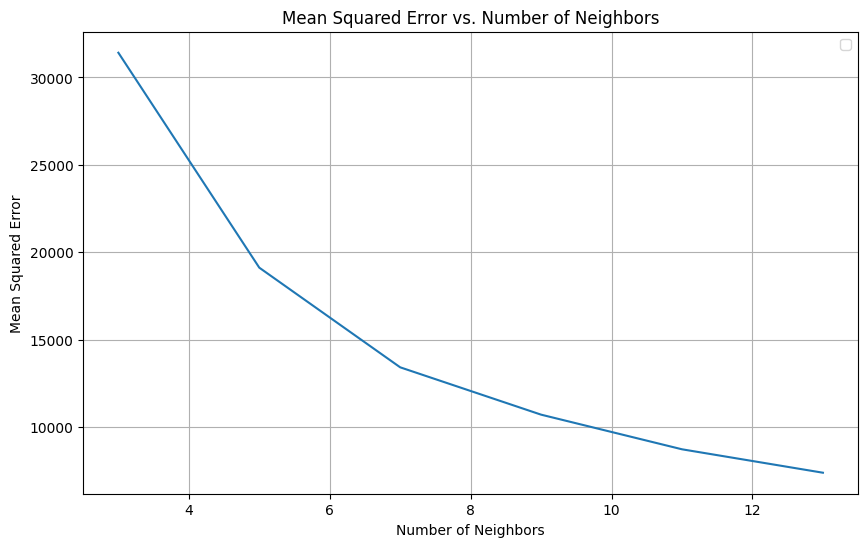

In [98]:
from sklearn.neighbors import KNeighborsRegressor

neighbor_values = [3, 5, 7, 9, 11, 13]

absolute_difference = []

# Loop over each neighbor value
for n in neighbor_values:
    # Initialize KNN classifier
    knn = KNeighborsRegressor(n_neighbors=n)

    # Train the model
    knn.fit(X_train, y_train)

    # Predict on the test set
    y_pred = knn.predict(X_test)

    # Evaluate the model
    mse_knn = mse(knn.predict(X_train),y_train,squared=False), mse(knn.predict(X_test),y_test,squared=False)

    #Deifference between the y_test and y_pred with increasing neighbors
    diff = abs(mse(knn.predict(X_test),y_test,squared=False) - mse(knn.predict(X_train),y_train,squared=False))
    absolute_difference.append(diff)

    print("The mse values using KNN for",n, " neighbors are", mse_knn)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(neighbor_values,absolute_difference)
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs. Number of Neighbors')
plt.legend()
plt.grid(True)
plt.show()

In [99]:
from tabulate import tabulate
from sklearn.neighbors import KNeighborsRegressor

# Define neighbor values
neighbor_values = [3, 5, 7, 9, 11, 13]

# Initialize list to store results
results = []

# Loop over each neighbor value
for n in neighbor_values:
    # Initialize KNN regressor
    knn = KNeighborsRegressor(n_neighbors=n)

    # Train the model
    knn.fit(X_train, y_train)

    # Predict on the test set
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)

    # Calculate MSE for training and test sets
    mse_train = mse(y_pred_train, y_train, squared=False)
    mse_test = mse(y_pred_test, y_test, squared=False)

    # Append results to list
    results.append([n, mse_train, mse_test])

print("K-Nearest Neigbors Output")

# Print results in tabular form
headers = ["Number of Neighbors", "Train MSE", "Test MSE"]
print(tabulate(results, headers=headers, tablefmt="grid"))

K-Nearest Neigbors Output
+-----------------------+-------------+------------+
|   Number of Neighbors |   Train MSE |   Test MSE |
+=======================+=============+============+
|                     3 |     78082.9 |     109495 |
+-----------------------+-------------+------------+
|                     5 |     85885.8 |     105010 |
+-----------------------+-------------+------------+
|                     7 |     89500.1 |     102927 |
+-----------------------+-------------+------------+
|                     9 |     91589.3 |     102310 |
+-----------------------+-------------+------------+
|                    11 |     92795.5 |     101536 |
+-----------------------+-------------+------------+
|                    13 |     93755.4 |     101157 |
+-----------------------+-------------+------------+


Trying to use a Random Forest Regressor

In [100]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=8).fit(X_train,y_train)

In [101]:
from tabulate import tabulate

# Assuming rf, X_train, y_train, X_test, y_test are defined

# Calculate Mean Squared Error for train and test data
train_mse_rf = mse(rf.predict(X_train), y_train, squared=False)
test_mse_rf = mse(rf.predict(X_test), y_test, squared=False)

# Prepare data for tabulation
data = [
    ["Train MSE", train_mse_rf],
    ["Test MSE", test_mse_rf]
]

print("Random Forest Regressor without Hyperparameter tuning")

# Define headers for the table
headers = ["Dataset", "Mean Squared Error"]

# Print the table
print(tabulate(data, headers=headers, tablefmt="grid"))

Random Forest Regressor without Hyperparameter tuning
+-----------+----------------------+
| Dataset   |   Mean Squared Error |
+===========+======================+
| Train MSE |              52932.1 |
+-----------+----------------------+
| Test MSE  |              58035.4 |
+-----------+----------------------+


his is actually a very good fit (the error difference is negligible for train test)

We would like to play around with this a bit

I would like to first attempt some hyperparameter tuning for the Random Forest Regressor

What is hyperparameter tuning and why do we want to exploit it? It improves their overall performance of a machine learning model and is set before the learning process and happens outside of the model. If hyperparameter tuning does not occur, the model will produce errors and inaccurate results as the loss function is not minimized.

What parameters will I be tuning?

n_estimators: The number of trees in the forest. Increasing this number generally improves performance, but also increases computational cost.
max_depth: The maximum depth of each tree in the forest. It controls the maximum depth of the tree. Deep trees can memorize noise in the training data, leading to overfitting, while shallow trees may not capture complex patterns
n_jobs: The number of jobs to run in parallel for both fit and predict. Setting it to -1 will use all available processors..

In [112]:
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize list to store results
results = []

# Specify parameters
params = {'n_estimators': [10, 20, 30],
          'max_depth': [5, 8, 10]}

# Loop through parameter combinations
for n_estimators in params['n_estimators']:
    for max_depth in params['max_depth']:
        # Initialize RandomForestRegressor with current parameters
        rf = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth)

        # Train the model
        rf.fit(X_train, y_train)

        # Predict on training data
        y_train_pred = rf.predict(X_train)

        # Calculate MSE for training data
        mse_train = mean_squared_error(y_train, y_train_pred, squared=False)

        # Predict on test data
        y_test_pred = rf.predict(X_test)

        # Calculate MSE for test data
        mse_test = mean_squared_error(y_test, y_test_pred, squared=False)

        # Append results to list
        results.append([n_estimators, max_depth, mse_train, mse_test])

print("Random Forest Regressor using Hyperparameter Tuning and GridSearchCV")

# Print results in tabular format
headers = ["n_estimators", "max_depth", "Train MSE", "Test MSE"]
print(tabulate(results, headers=headers,tablefmt="grid"))

Random Forest Regressor using Hyperparameter Tuning and GridSearchCV
+----------------+-------------+-------------+------------+
|   n_estimators |   max_depth |   Train MSE |   Test MSE |
+================+=============+=============+============+
|             10 |           5 |     66768.2 |    69588.9 |
+----------------+-------------+-------------+------------+
|             10 |           8 |     53324.2 |    59447.9 |
+----------------+-------------+-------------+------------+
|             10 |          10 |     44651.8 |    55206   |
+----------------+-------------+-------------+------------+
|             20 |           5 |     66499.7 |    69239.1 |
+----------------+-------------+-------------+------------+
|             20 |           8 |     52532.1 |    58517.4 |
+----------------+-------------+-------------+------------+
|             20 |          10 |     44061.9 |    54175.7 |
+----------------+-------------+-------------+------------+
|             30 |           5 

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

# Define the AdaBoostRegressor
adaboost_regressor = AdaBoostRegressor(random_state=42)

# Define the hyperparameters grid for AdaBoost
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.2, 0.5]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=adaboost_regressor, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Perform grid search
grid_search.fit(X_train, y_train)

print

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_adaboost_regressor = grid_search.best_estimator_

mse_Adaboost = mse(best_adaboost_regressor.predict(X_train),y_train,squared=False), mse(best_adaboost_regressor.predict(X_test),y_test,squared=False)
print("\nMean Squared Error (MSE) on Test Set :",mse_Adaboost)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 50}

Mean Squared Error (MSE) on Test Set : (75068.90593091777, 75565.50436843188)


We have tested a bunch of algorithms to check for overfit, underfit using MSE. We can compare the models and see with which model we want to proceed.

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as mse
import pandas as pd

# Define the AdaBoostRegressor
adaboost_regressor = AdaBoostRegressor(random_state=42)

# Define the hyperparameters grid for AdaBoost
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.2, 0.5]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=adaboost_regressor, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the results as a DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Print the results of every parameter combination
print("Results for each parameter combination:")
print(results_df[['param_n_estimators', 'param_learning_rate', 'mean_test_score', 'std_test_score']])

# Print the best parameters
print("\nBest Parameters:", grid_search.best_params_)

# Get the best model
best_adaboost_regressor = grid_search.best_estimator_

# Calculate MSE on train and test sets
mse_train = mse(best_adaboost_regressor.predict(X_train), y_train, squared=False)
mse_test = mse(best_adaboost_regressor.predict(X_test), y_test, squared=False)
print("\nMean Squared Error (MSE) on Train Set:", mse_train)
print("Mean Squared Error (MSE) on Test Set:", mse_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Results for each parameter combination:
  param_n_estimators param_learning_rate  mean_test_score  std_test_score
0                 50                 0.1         0.566993        0.024024
1                100                 0.1         0.535385        0.025230
2                150                 0.1         0.515162        0.023191
3                 50                 0.2         0.536749        0.024913
4                100                 0.2         0.500534        0.020302
5                150                 0.2         0.497360        0.017572
6                 50                 0.5         0.468858        0.019909
7                100                 0.5         0.443916        0.030310
8                150                 0.5         0.443916        0.030310

Best Parameters: {'learning_rate': 0.1, 'n_estimators': 50}

Mean Squared Error (MSE) on Train Set: 74890.77061011312
Mean Squared Error (MSE) on Test Set: 764

In [105]:
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
import numpy as np


# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize list to store results
results = []

# Specify parameters
params = {'n_estimators': [100, 150, 250],
          'learning_rate': [0.01, 0.1, 1]}

# Loop through parameter combinations
for n_estimators in params['n_estimators']:
    for learning_rate in params['learning_rate']:
        # Initialize AdaBoostRegressor with current parameters
        adaboost_regressor = AdaBoostRegressor(n_estimators=n_estimators, learning_rate=learning_rate)

        gsa=GridSearchCV(estimator=adaboost_regressor, param_grid=params, cv=3, scoring='neg_mean_squared_error' )

        # Train the model
        gsa.fit(X_train, y_train)

        # Predict on training data
        y_train_pred = gsa.predict(X_train)

        # Calculate MSE for training data
        mse_train = mean_squared_error(y_train, y_train_pred, squared=False)

        # Predict on test data
        y_test_pred = gsa.predict(X_test)

        # Calculate MSE for test data
        mse_test = mean_squared_error(y_test, y_test_pred, squared=False)

        # Append results to list
        results.append([n_estimators, learning_rate, mse_train, mse_test])

print("ADABoost Regressor Results")

# Print results in tabular format
headers = ["N_estimators", "Learning_rate", "Train MSE", "Test MSE"]
print(tabulate(results, headers=headers,tablefmt="grid"))

ADABoost Regressor Results
+----------------+-----------------+-------------+------------+
|   N_estimators |   Learning_rate |   Train MSE |   Test MSE |
+================+=================+=============+============+
|            100 |            0.01 |     73708.8 |    75914.4 |
+----------------+-----------------+-------------+------------+
|            100 |            0.1  |     73478.8 |    75641.6 |
+----------------+-----------------+-------------+------------+
|            100 |            1    |     73629.5 |    75792.5 |
+----------------+-----------------+-------------+------------+
|            150 |            0.01 |     73539.3 |    75682   |
+----------------+-----------------+-------------+------------+
|            150 |            0.1  |     73700.8 |    75886.4 |
+----------------+-----------------+-------------+------------+
|            150 |            1    |     73753.6 |    75860.3 |
+----------------+-----------------+-------------+------------+
|            

In [86]:
#We will do the following code edit to make an application based on the best model from the above.

We will be building a streamlit application where an end user can insert number of bedrooms, rooms in the complex, population per household and Ocean proximity. We will be choosing the best model in terms of fitting and lowest MSE score to predict the house price. So we will make a few changes to the features but predict the same label

In [106]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,126.0,8.3252,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,1138.0,8.3014,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,177.0,7.2574,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,219.0,5.6431,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,259.0,3.8462,0,0,0,1,0


We will make some adjustments to the data

In [107]:
X_app = X.drop(['longitude','latitude','total_rooms'],axis = 1)  #features

In [108]:
X_app.head()

,housing_median_age,total_bedrooms,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,41.0,129.0,126.0,8.3252,0,0,0,1,0
1,21.0,1106.0,1138.0,8.3014,0,0,0,1,0
2,52.0,190.0,177.0,7.2574,0,0,0,1,0
3,52.0,235.0,219.0,5.6431,0,0,0,1,0
4,52.0,280.0,259.0,3.8462,0,0,0,1,0


In [109]:
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

The best model performance both in terms of fit and MSE is Random Forest Regressor with 30 estimators and 10 as max depth

In [113]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=10, n_estimators = 10).fit(X_train,y_train)

In [114]:
rf.predict(X_test)

array([210588.30682335, 155970.58234803, 193143.62479517, ...,
        79946.11934296, 123481.55819903, 119630.56625462])

In [115]:
import pickle

# Assuming rf is your trained RandomForestRegressor model

# Save the model
with open('random_forest_model_CHP.pkl', 'wb') as file:
    pickle.dump(rf, file)

# Load the model
with open('random_forest_model_CHP.pkl', 'rb') as file:
    loaded_model = pickle.load(file)